<a href="https://colab.research.google.com/github/Sambasivarao-Gorantla/credit-card-fraud-detection/blob/main/creditcard_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!kaggle datasets download -d mlg-ulb/creditcardfraud
!unzip creditcardfraud.zip

Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
License(s): DbCL-1.0
 82% 54.0M/66.0M [00:01<00:00, 45.8MB/s]
100% 66.0M/66.0M [00:01<00:00, 50.8MB/s]
Archive:  creditcardfraud.zip
  inflating: creditcard.csv          


In [2]:
import os
import time

import numpy as np
import pandas as pd

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# scikit learn
import sklearn

# unbalanced dataset manipulation
from imblearn.over_sampling import SMOTE

# loading the data

In [3]:
data = pd.read_csv('/content/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

# data manipulation

## handling missing values

In [5]:
data.isna().any()

,0
Time,False
V1,False
V2,False
V3,False
V4,False
V5,False
V6,False
V7,False
V8,False
V9,False


## handling duplicate values

In [6]:
data[data.duplicated()]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
113,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
114,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
115,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282987,171288.0,1.912550,-0.455240,-1.750654,0.454324,2.089130,4.160019,-0.881302,1.081750,1.022928,...,-0.524067,-1.337510,0.473943,0.616683,-0.283548,-1.084843,0.073133,-0.036020,11.99,0
283483,171627.0,-1.464380,1.368119,0.815992,-0.601282,-0.689115,-0.487154,-0.303778,0.884953,0.054065,...,0.287217,0.947825,-0.218773,0.082926,0.044127,0.639270,0.213565,0.119251,6.82,0
283485,171627.0,-1.457978,1.378203,0.811515,-0.603760,-0.711883,-0.471672,-0.282535,0.880654,0.052808,...,0.284205,0.949659,-0.216949,0.083250,0.044944,0.639933,0.219432,0.116772,11.93,0
284191,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,...,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0


In [7]:
data.drop_duplicates(inplace=True)

# data visualization

<Axes: >

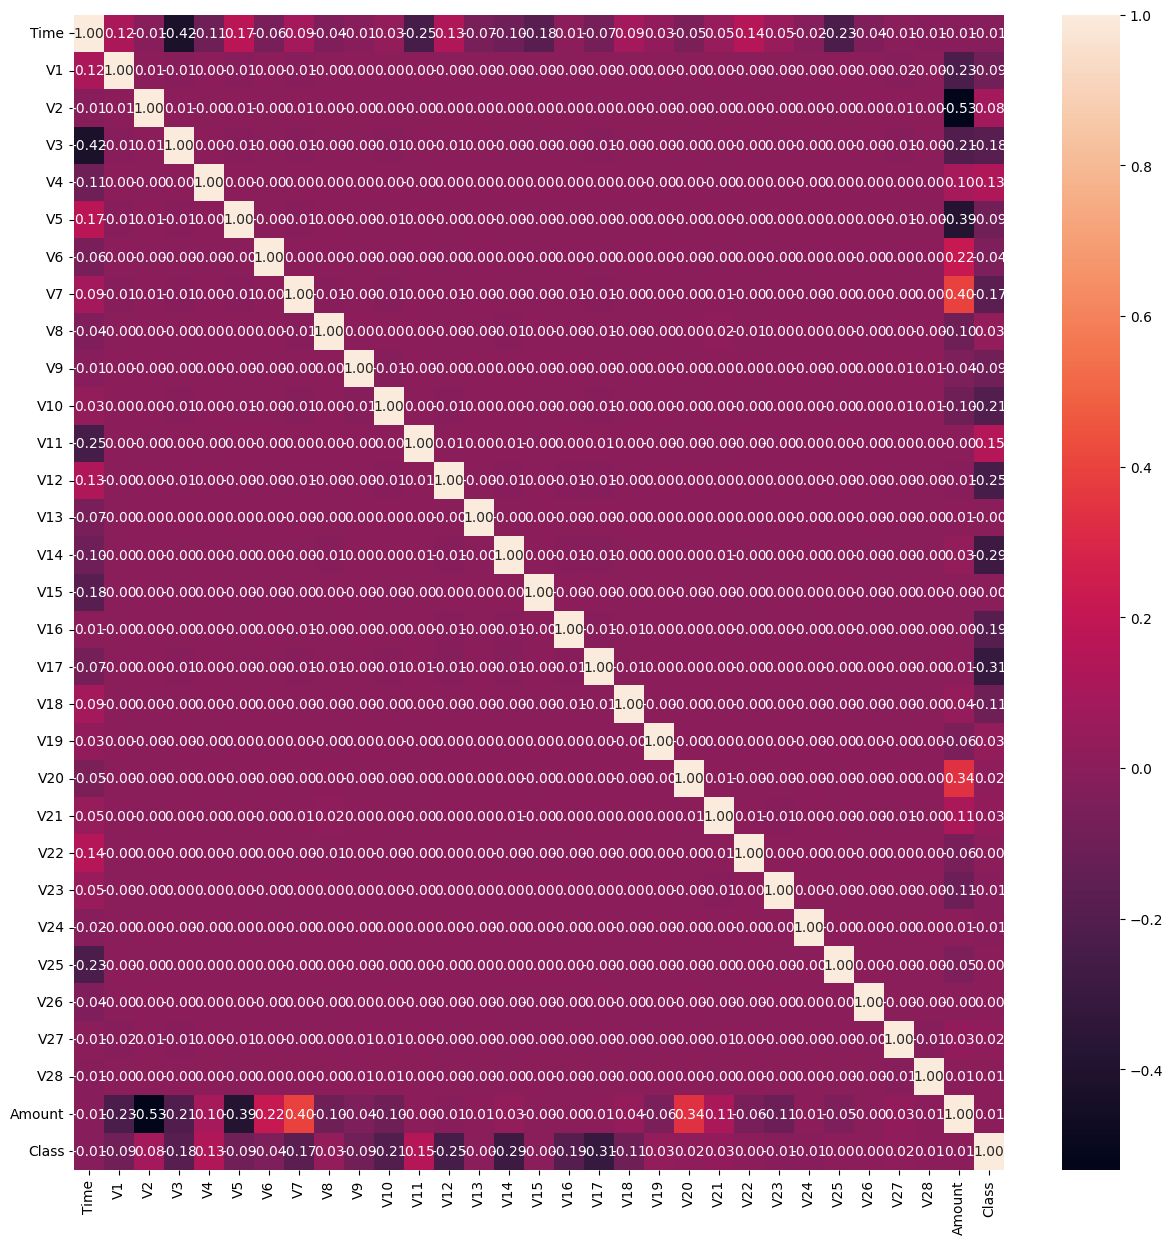

In [8]:
plt.figure(figsize = (15, 15))
sns.heatmap(data.corr(), annot = True, fmt='.2f')

# train_test_split

In [9]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(data, test_size = 0.1, random_state = 42)

In [10]:
X_train, y_train = train_data.drop('Class', axis = 1), train_data['Class']
X_test, y_test = test_data.drop('Class', axis = 1), test_data['Class']

#  building a model

In [11]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [12]:
rnd_clf.score(X_test, y_test)

0.9996475522503789

In [13]:
y_test_pred = rnd_clf.predict(X_test)

In [14]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28331
           1       0.97      0.79      0.87        42

    accuracy                           1.00     28373
   macro avg       0.99      0.89      0.93     28373
weighted avg       1.00      1.00      1.00     28373



<Axes: >

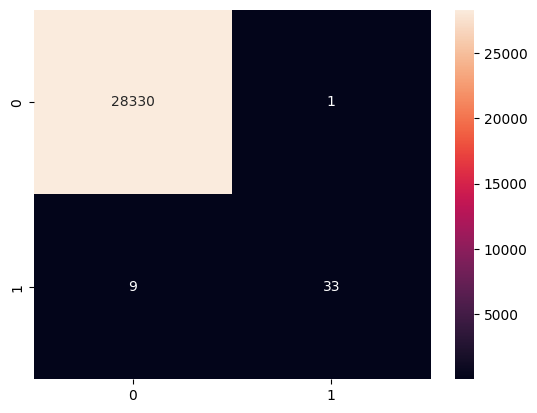

In [15]:
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot = True, fmt = 'd')

## the recall score for positive instances is low(79%), because of very less number of positive instances

### so let's use the imblearn package and rebalance the dataset

In [16]:
smote = SMOTE(random_state = 42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [17]:
X_train.shape, X_train_smote.shape

((255353, 30), (509844, 30))

In [18]:
y_train_smote.value_counts()

,count
Class,
0,254922
1,254922


### the dataset is balanced now

In [25]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(n_estimators = 500, random_state = 42)
xgb_clf.fit(X_train_smote, y_train_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [26]:
xgb_clf.score(X_test, y_test)

0.9995770627004547

In [27]:
y_test_pred_smote = xgb_clf.predict(X_test)

In [28]:
print(classification_report(y_test, y_test_pred_smote))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28331
           1       0.86      0.86      0.86        42

    accuracy                           1.00     28373
   macro avg       0.93      0.93      0.93     28373
weighted avg       1.00      1.00      1.00     28373



<Axes: >

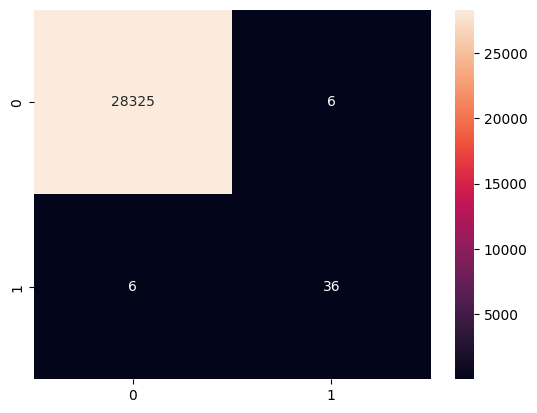

In [29]:
sns.heatmap(confusion_matrix(y_test, y_test_pred_smote), annot = True, fmt = 'd')

In [30]:
rnd_clf_smote = RandomForestClassifier(n_estimators = 100, random_state = 42)
rnd_clf_smote.fit(X_train_smote, y_train_smote)

RandomForestClassifier(random_state=42)

In [31]:
rnd_clf_smote.score(X_test, y_test)

0.9996475522503789

In [32]:
y_test_pred_smote = rnd_clf_smote.predict(X_test)

In [33]:
print(classification_report(y_test, y_test_pred_smote))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28331
           1       0.90      0.86      0.88        42

    accuracy                           1.00     28373
   macro avg       0.95      0.93      0.94     28373
weighted avg       1.00      1.00      1.00     28373



<Axes: >

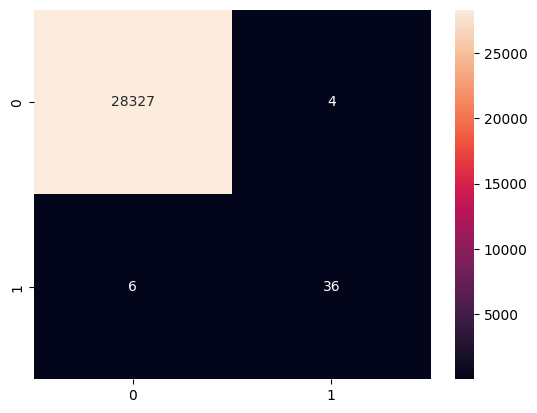

In [34]:
sns.heatmap(confusion_matrix(y_test, y_test_pred_smote), annot = True, fmt = 'd')

# the mistake we are doing is we are not rebalancing the dataset before splitting the dataset into test and training data

In [35]:
data = pd.read_csv('/content/creditcard.csv')

In [36]:
data_values, data_labels = data.drop('Class', axis = 1), data['Class']

In [37]:
data_values_smote, data_labels_smote = smote.fit_resample(data_values, data_labels)

In [38]:
X_train_smote, X_test, y_train_smote, y_test = train_test_split(data_values_smote, data_labels_smote, test_size = 0.1, random_state = 42)

### training a XGB Classfier

In [39]:
xgb_clf = XGBClassifier(n_estimators = 500, random_state = 42)
xgb_clf.fit(X_train_smote, y_train_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [40]:
xgb_clf.score(X_test, y_test)

0.9998593109755025

In [41]:
print(classification_report(y_test, xgb_clf.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28499
           1       1.00      1.00      1.00     28364

    accuracy                           1.00     56863
   macro avg       1.00      1.00      1.00     56863
weighted avg       1.00      1.00      1.00     56863



In [42]:
from sklearn.metrics import recall_score

recall_score(y_test, xgb_clf.predict(X_test))

1.0

<Axes: >

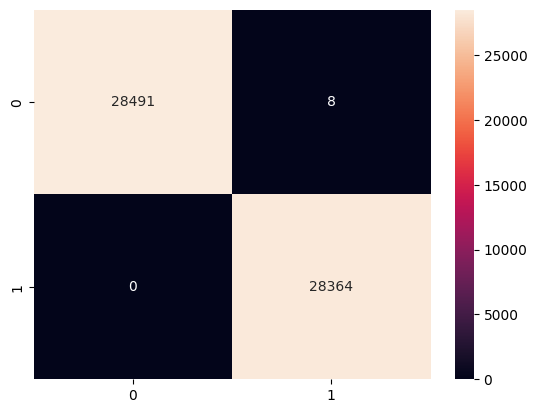

In [43]:
sns.heatmap(confusion_matrix(y_test, xgb_clf.predict(X_test)), annot = True, fmt = 'd')